In [ ]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

In [2]:
for idx, file_id in enumerate(inaugural.fileids()):
    print(f"#{idx+1}\t{file_id}")

#1	1789-Washington.txt
#2	1793-Washington.txt
#3	1797-Adams.txt
#4	1801-Jefferson.txt
#5	1805-Jefferson.txt
#6	1809-Madison.txt
#7	1813-Madison.txt
#8	1817-Monroe.txt
#9	1821-Monroe.txt
#10	1825-Adams.txt
#11	1829-Jackson.txt
#12	1833-Jackson.txt
#13	1837-VanBuren.txt
#14	1841-Harrison.txt
#15	1845-Polk.txt
#16	1849-Taylor.txt
#17	1853-Pierce.txt
#18	1857-Buchanan.txt
#19	1861-Lincoln.txt
#20	1865-Lincoln.txt
#21	1869-Grant.txt
#22	1873-Grant.txt
#23	1877-Hayes.txt
#24	1881-Garfield.txt
#25	1885-Cleveland.txt
#26	1889-Harrison.txt
#27	1893-Cleveland.txt
#28	1897-McKinley.txt
#29	1901-McKinley.txt
#30	1905-Roosevelt.txt
#31	1909-Taft.txt
#32	1913-Wilson.txt
#33	1917-Wilson.txt
#34	1921-Harding.txt
#35	1925-Coolidge.txt
#36	1929-Hoover.txt
#37	1933-Roosevelt.txt
#38	1937-Roosevelt.txt
#39	1941-Roosevelt.txt
#40	1945-Roosevelt.txt
#41	1949-Truman.txt
#42	1953-Eisenhower.txt
#43	1957-Eisenhower.txt
#44	1961-Kennedy.txt
#45	1965-Johnson.txt
#46	1969-Nixon.txt
#47	1973-Nixon.txt
#48	1977-Car

In [3]:
presidents = set([file_id[5:-4] for file_id in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [
        inaugural.sents(file_id)
        for file_id in inaugural.fileids()
        if president in file_id
    ]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sentences_num_by_president_name: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sentences_num_by_president_name.items()):
    print(f"{idx + 1}:\t{president_item[0]} - {president_item[1]} sentences")

1:	Harrison - 367 sentences
2:	Bush - 337 sentences
3:	Roosevelt - 308 sentences
4:	Reagan - 253 sentences
5:	Monroe - 251 sentences
6:	McKinley - 230 sentences
7:	Eisenhower - 215 sentences
8:	Obama - 204 sentences
9:	Coolidge - 197 sentences
10:	Clinton - 193 sentences
11:	Nixon - 175 sentences
12:	Biden - 170 sentences
13:	Lincoln - 165 sentences
14:	Taft - 159 sentences
15:	Hoover - 158 sentences
16:	Polk - 153 sentences
17:	Harding - 149 sentences
18:	Wilson - 128 sentences
19:	Truman - 116 sentences
20:	Garfield - 112 sentences
21:	Adams - 111 sentences
22:	Pierce - 104 sentences
23:	Cleveland - 102 sentences
24:	VanBuren - 95 sentences
25:	Johnson - 94 sentences
26:	Trump - 90 sentences
27:	Buchanan - 89 sentences
28:	Jefferson - 87 sentences
29:	Grant - 85 sentences
30:	Hayes - 59 sentences
31:	Jackson - 55 sentences
32:	Madison - 54 sentences
33:	Carter - 53 sentences
34:	Kennedy - 52 sentences
35:	Washington - 28 sentences
36:	Taylor - 22 sentences


In [4]:
PRESIDENT_A = "Bush"
PRESIDENT_B = "Harrison"

In [5]:
speeches_a = [
    inaugural.sents(file_id)
    for file_id in inaugural.fileids()
    if PRESIDENT_A in file_id
]

sents_a = [sent for speech in speeches_a for sent in speech]
for sentence in sents_a[:50]:
    print(" ".join(sentence))

print(f"...\n\nSpeaker: President {PRESIDENT_A}, {len(sents_a)} sentences")

Mr . Chief Justice , Mr . President , Vice President Quayle , Senator Mitchell , Speaker Wright , Senator Dole , Congressman Michael , and fellow citizens , neighbors , and friends :
There is a man here who has earned a lasting place in our hearts and in our history .
President Reagan , on behalf of our Nation , I thank you for the wonderful things that you have done for America .
I have just repeated word for word the oath taken by George Washington 200 years ago , and the Bible on which I placed my hand is the Bible on which he placed his .
It is right that the memory of Washington be with us today , not only because this is our Bicentennial Inauguration , but because Washington remains the Father of our Country .
And he would , I think , be gladdened by this day ; for today is the concrete expression of a stunning fact : our continuity these 200 years since our government began .
We meet on democracy ' s front porch , a good place to talk as neighbors and as friends .
For this is a 

In [6]:
speeches_b = [
    inaugural.sents(file_id)
    for file_id in inaugural.fileids()
    if PRESIDENT_B in file_id
]

sents_b = [sent for speech in speeches_b for sent in speech]
for sentence in sents_b[:50]:
    print(" ".join(sentence))
print(f"...\n\nSpeaker: President {PRESIDENT_B}, {len(sents_b)} sentences")

Called from a retirement which I had supposed was to continue for the residue of my life to fill the chief executive office of this great and free nation , I appear before you , fellow - citizens , to take the oaths which the Constitution prescribes as a necessary qualification for the performance of its duties ; and in obedience to a custom coeval with our Government and what I believe to be your expectations I proceed to present to you a summary of the principles which will govern me in the discharge of the duties which I shall be called upon to perform .
It was the remark of a Roman consul in an early period of that celebrated Republic that a most striking contrast was observable in the conduct of candidates for offices of power and trust before and after obtaining them , they seldom carrying out in the latter case the pledges and promises made in the former .
However much the world may have improved in many respects in the lapse of upward of two thousand years since the remark was 

In [7]:
from authorship_tool.util import frequency_calculator as fc

existing_tags: set[str] = set()

for sentence in sents_a + sents_b:
    existing_tags.update(fc.all_pos_frequency(sentence).keys())

print(existing_tags)

{':', 'NNS', 'NNP', 'JJR', 'VBD', 'PRP$', 'POS', 'NNPS', 'RBS', 'RBR', '(', 'VBN', 'CD', 'RB', 'EX', 'JJ', '.', 'TO', 'IN', 'VBP', 'UH', 'WP', 'CC', 'VB', ')', "''", 'PRP', 'VBG', ',', 'WDT', 'DT', 'RP', 'NN', 'VBZ', 'WP$', 'MD', 'WRB', 'PDT', 'JJS'}


In [ ]:
from authorship_tool.util.dataset_generator import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(existing_tags)
data = []
correctness = []

for sentence in sents_a:
    x, y = dg.generate_dataset_sent(sentence, existing_tags, True)
    data.append(x)
    correctness.append(y)

for sentence in sents_b:
    x, y = dg.generate_dataset_sent(sentence, existing_tags, False)
    data.append(x)
    correctness.append(y)

In [9]:
df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))

,word variation,uncommon word frequency,sentence length,average word length,:,NNS,NNP,JJR,VBD,PRP$,...,WDT,DT,RP,NN,VBZ,WP$,MD,WRB,PDT,JJS
0,0.617647,0.941176,34,4.382353,0.029412,0.029412,0.029412,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.842105,0.421053,19,3.526316,0.000000,0.052632,0.000000,0.0,0.000000,0.105263,...,0.000000,0.105263,0.0,0.052632,0.052632,0.0,0.000000,0.000000,0.0,0.0
2,0.869565,0.565217,23,4.000000,0.000000,0.043478,0.043478,0.0,0.000000,0.043478,...,0.000000,0.043478,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.771429,0.542857,35,3.714286,0.000000,0.028571,0.057143,0.0,0.057143,0.028571,...,0.057143,0.085714,0.0,0.028571,0.028571,0.0,0.000000,0.000000,0.0,0.0
4,0.781250,0.468750,32,4.531250,0.000000,0.000000,0.031250,0.0,0.000000,0.062500,...,0.000000,0.031250,0.0,0.031250,0.031250,0.0,0.000000,0.000000,0.0,0.0
5,0.941176,0.647059,34,4.000000,0.029412,0.029412,0.000000,0.0,0.029412,0.058824,...,0.000000,0.029412,0.0,0.029412,0.029412,0.0,0.029412,0.000000,0.0,0.0
6,0.950000,0.650000,20,3.500000,0.000000,0.050000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.050000,0.0,0.050000,0.000000,0.0,0.000000,0.000000,0.0,0.0
7,0.739130,0.521739,23,3.521739,0.000000,0.043478,0.000000,0.0,0.000000,0.086957,...,0.000000,0.086957,0.0,0.043478,0.086957,0.0,0.000000,0.086957,0.0,0.0
8,1.000000,0.600000,10,3.400000,0.000000,0.000000,0.100000,0.0,0.000000,0.100000,...,0.000000,0.100000,0.0,0.100000,0.100000,0.0,0.000000,0.000000,0.0,0.0
9,1.000000,0.625000,8,2.750000,0.125000,0.125000,0.000000,0.0,0.000000,0.125000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [10]:
print(df.shape)

(704, 43)


In [11]:
print(df.dtypes)

word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
:                          float64
NNS                        float64
NNP                        float64
JJR                        float64
VBD                        float64
PRP$                       float64
POS                        float64
NNPS                       float64
RBS                        float64
RBR                        float64
(                          float64
VBN                        float64
CD                         float64
RB                         float64
EX                         float64
JJ                         float64
.                          float64
TO                         float64
IN                         float64
VBP                        float64
UH                         float64
WP                         float64
CC                         float64
VB                         float64
)                   

In [12]:
print(df.isna().sum())

word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
:                          0
NNS                        0
NNP                        0
JJR                        0
VBD                        0
PRP$                       0
POS                        0
NNPS                       0
RBS                        0
RBR                        0
(                          0
VBN                        0
CD                         0
RB                         0
EX                         0
JJ                         0
.                          0
TO                         0
IN                         0
VBP                        0
UH                         0
WP                         0
CC                         0
VB                         0
)                          0
''                         0
PRP                        0
VBG                        0
,                          0
WDT                        0
DT            

In [ ]:
import sklearn
import lightgbm as lgb


DESIRED_SCORE = 0.90


def learn(
    df: pd.DataFrame, nd_correctness: np.ndarray
) -> tuple[
    lgb.LGBMClassifier,
    pd.DataFrame,
    pd.DataFrame,
    np.ndarray,
    np.ndarray,
    np.ndarray,
    np.ndarray,
    float,
]:
    (
        train_data,
        test_data,
        train_ans,
        test_ans,
    ) = sklearn.model_selection.train_test_split(df, nd_correctness)

    model = lgb.LGBMClassifier()
    model.fit(train_data.values, train_ans)

    ans_pred_prob = model.predict_proba(test_data)[:, 1]
    ans_pred = model.predict(test_data)

    val = sklearn.metrics.roc_auc_score(test_ans, ans_pred_prob)
    return (
        model,
        train_data,
        test_data,
        train_ans,
        test_ans,
        ans_pred_prob,
        ans_pred,
        val,
    )


val = 0
while val < DESIRED_SCORE:
    (
        model,
        train_data,
        test_data,
        train_ans,
        test_ans,
        ans_pred_prob,
        ans_pred,
        val,
    ) = learn(df, nd_correctness)

In [14]:
print(f"auc-rocスコア: {val}")

auc-rocスコア: 0.9055383022774327


In [15]:
from os import makedirs, path, getcwd

dump_dir = path.join(getcwd(), "dump", "inaugural")
makedirs(dump_dir, exist_ok=True)

In [16]:
import pickle

with open(path.join(dump_dir, "lgbm_model.pkl"), "wb") as f:
    pickle.dump(model, f)

In [17]:
data_dir = path.join(dump_dir, "data")
makedirs(data_dir, exist_ok=True)

In [18]:
train_data.to_csv(path.join(data_dir, "train_data.csv"), index=False)
test_data.to_csv(path.join(data_dir, "test_data.csv"), index=False)
pd.DataFrame(train_ans).to_csv(
    path.join(data_dir, "train_ans.csv"), index=False, header=False
)
pd.DataFrame(test_ans).to_csv(
    path.join(data_dir, "test_ans.csv"), index=False, header=False
)
pd.DataFrame(ans_pred_prob).to_csv(
    path.join(data_dir, "and_pred_prob.csv"), index=False, header=False
)
pd.DataFrame(ans_pred).to_csv(
    path.join(data_dir, "ans_pred.csv"), index=False, header=False
)

In [19]:
display(pd.crosstab(test_ans, ans_pred))

col_0,False,True
row_0,,
False,80,12
True,20,64


In [20]:
import shap

exp = shap.TreeExplainer(model)
test_shap_val = exp.shap_values(test_data)[1]

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [21]:
pd.DataFrame(test_shap_val).to_csv(
    path.join(data_dir, "test_shap_val.csv"), index=False, header=False
)

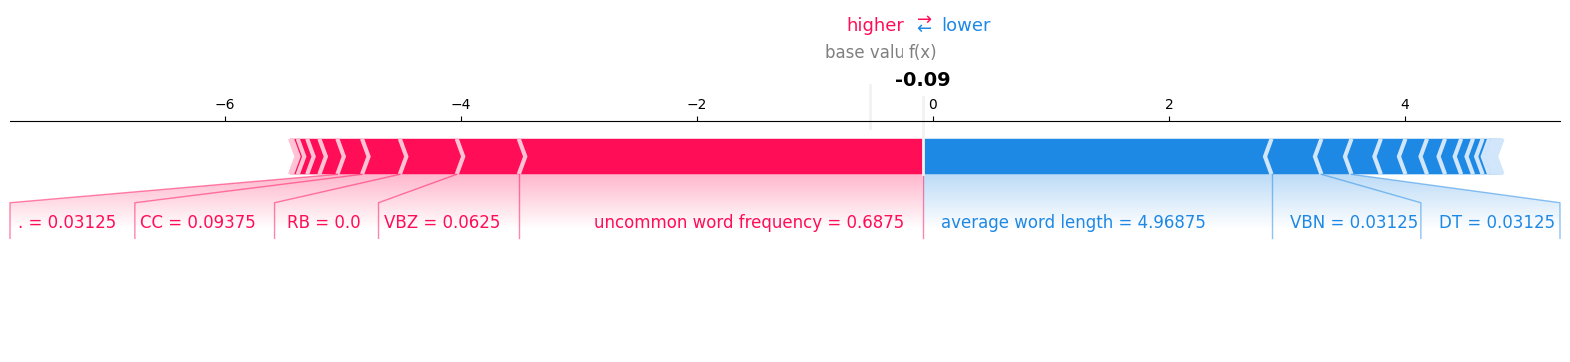

In [22]:
# shap.initjs()
shap.force_plot(
    exp.expected_value[1], test_shap_val[0], test_data.iloc[0], matplotlib=True
)

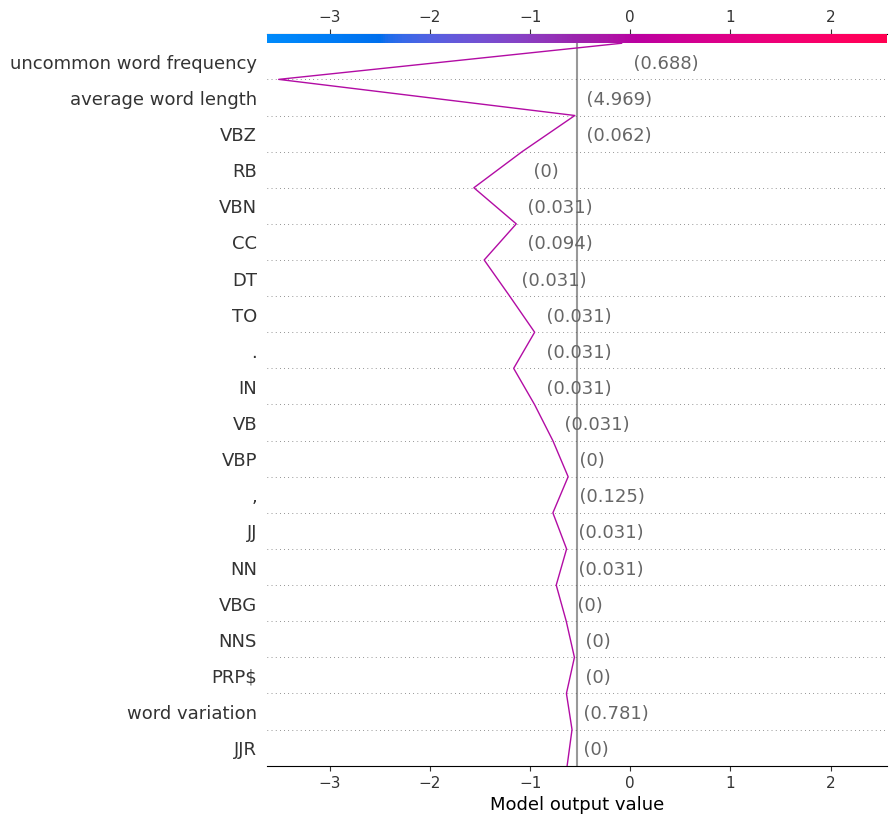

In [23]:
shap.decision_plot(exp.expected_value[1], test_shap_val[0], test_data.iloc[0])

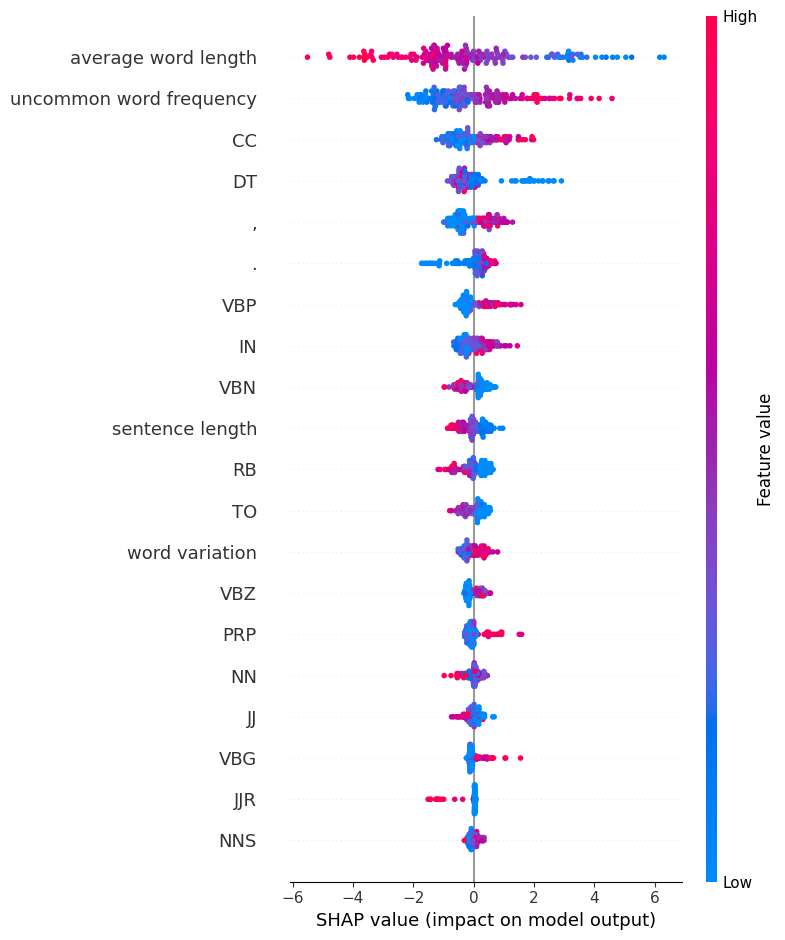

In [24]:
shap.summary_plot(test_shap_val, test_data)

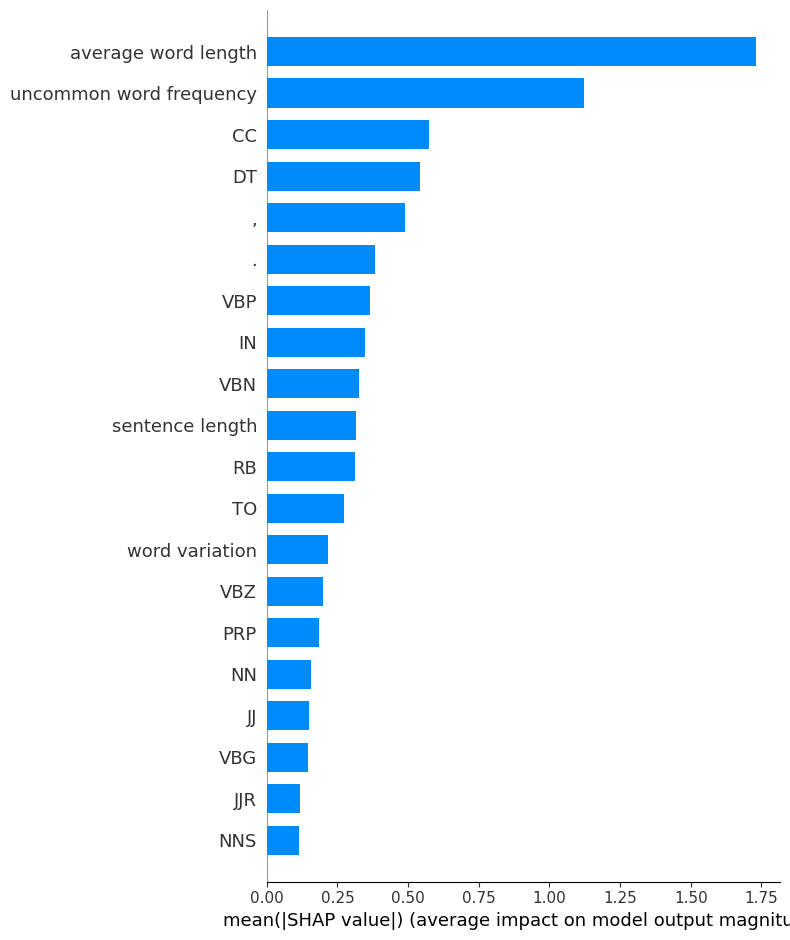

In [25]:
shap.summary_plot(test_shap_val, test_data, plot_type="bar")